In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("/content/drive/MyDrive/M1_Semester2/DataMining/TERM-PROJECT/heart.csv")

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


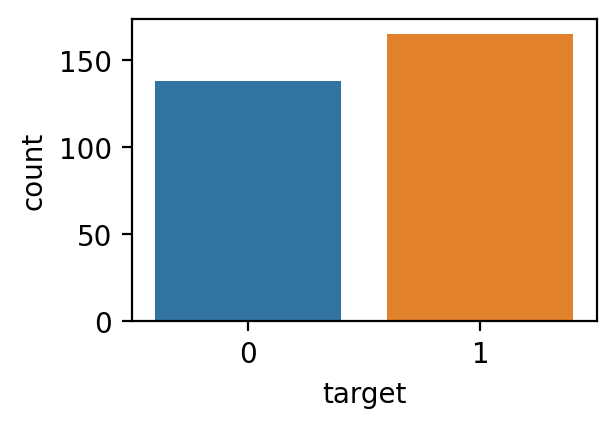

In [32]:
plt.figure(figsize=(3, 2), dpi=200)
sns.countplot(x='target', data=data)
plt.savefig("target.png")

<Figure size 900x600 with 0 Axes>

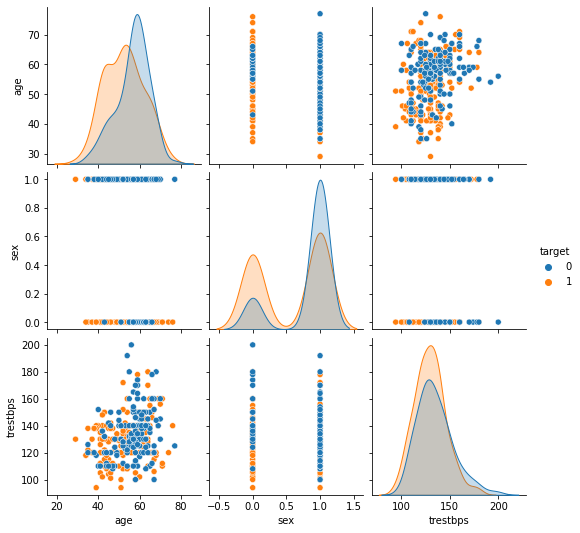

In [36]:
plt.figure(figsize=(3, 2), dpi=300);
sns.pairplot(data[['age', 'sex', 'trestbps', 'target']], hue='target');
plt.savefig("hue.png");

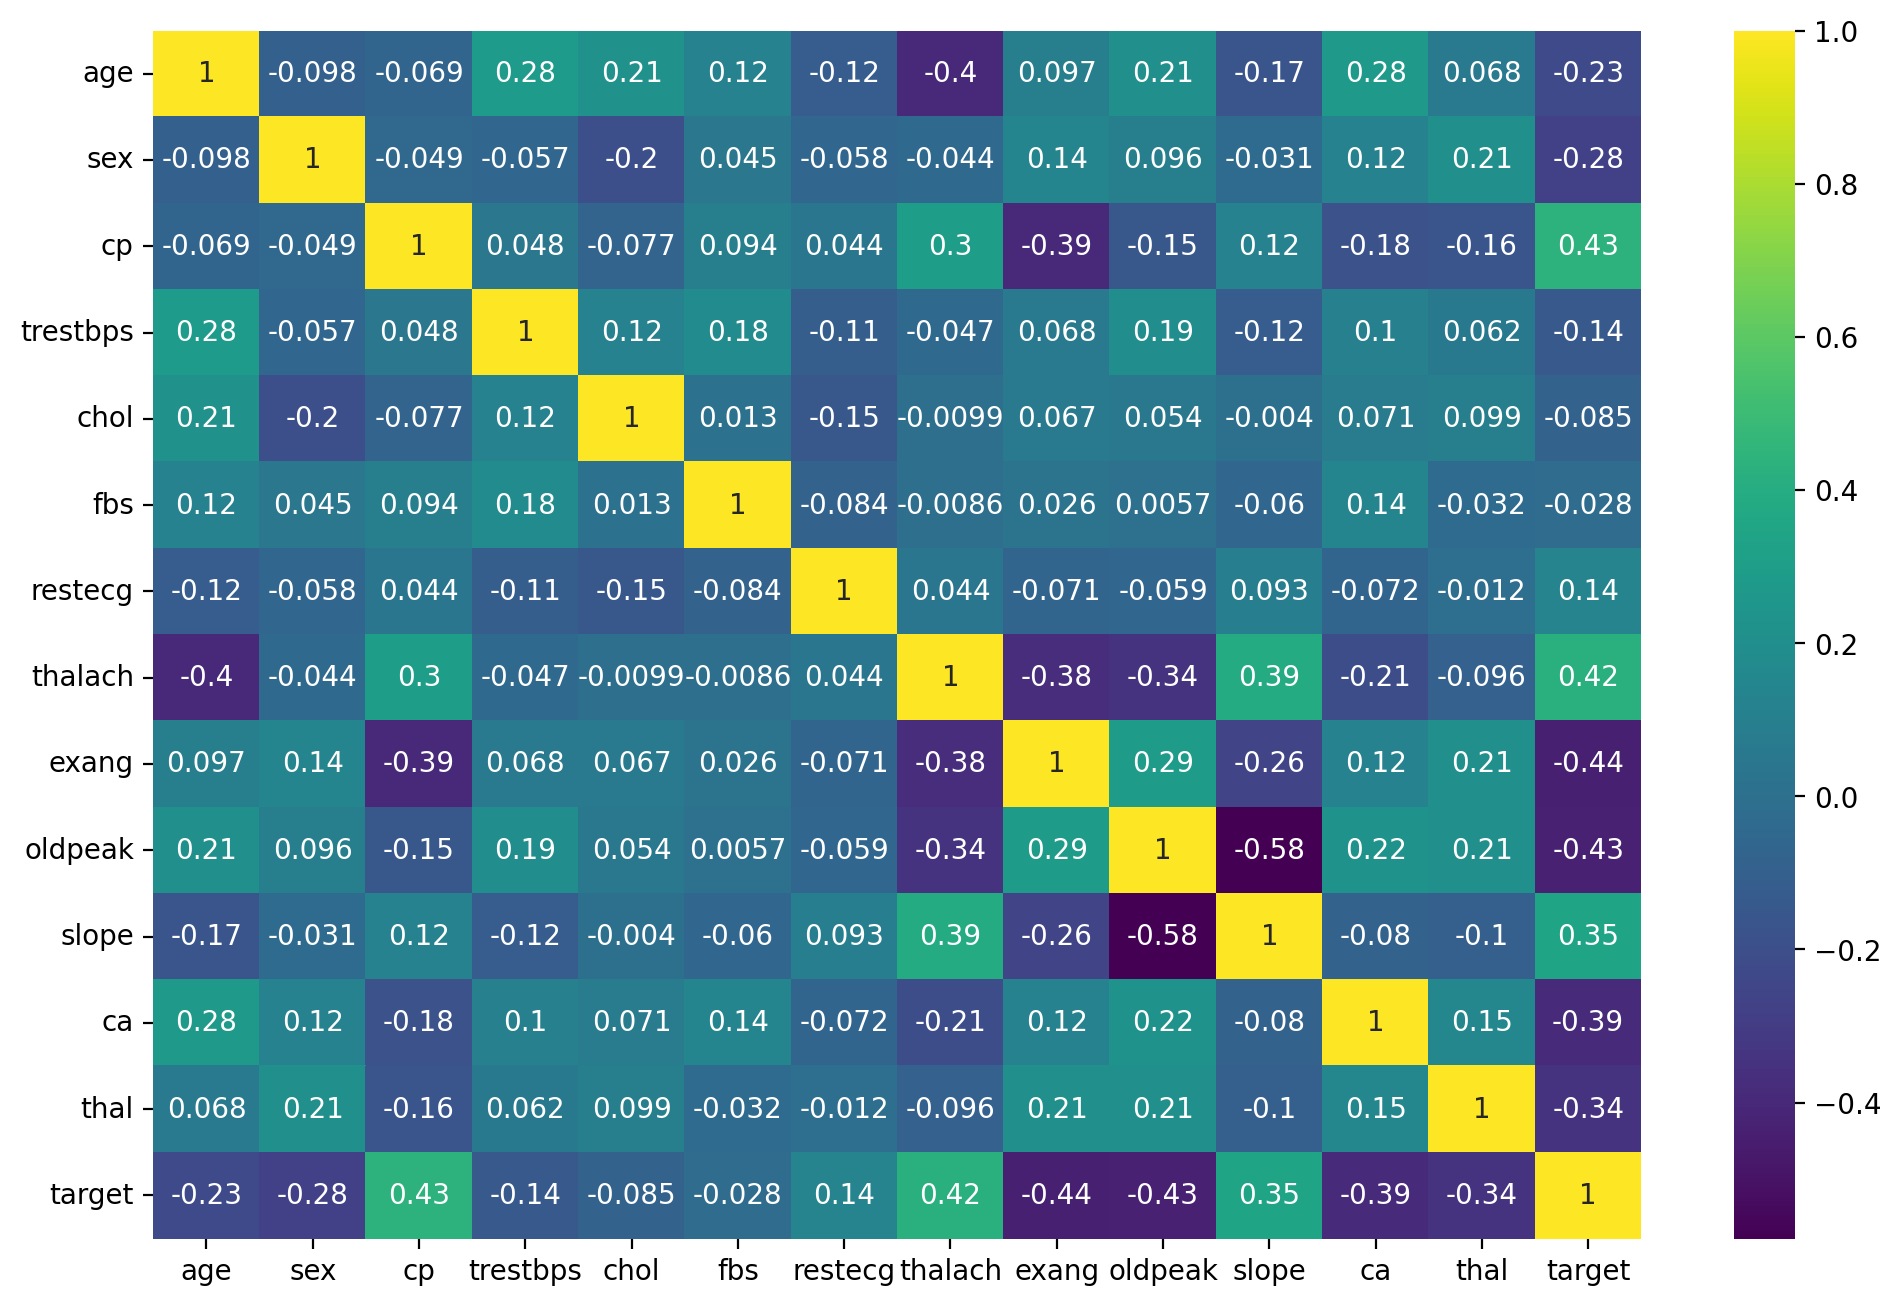

In [39]:
plt.figure(figsize=(12,8), dpi=200)
sns.heatmap(data.corr(),cmap='viridis',annot=True)
plt.savefig("corr.png")

In [44]:
x = data.drop('target', axis = 1)
y = data['target']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=33)

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
import xgboost

In [54]:
clf1 = LogisticRegression()
clf2 = GaussianNB()
clf3 = DecisionTreeClassifier()
clf4 = xgboost.XGBClassifier()

In [55]:
clf1.fit(x_train, y_train)
clf2.fit(x_train, y_train)
clf3.fit(x_train, y_train)
clf4.fit(x_train, y_train)

XGBClassifier()

In [59]:
y1 = clf1.predict(x_test)
y2 = clf2.predict(x_test)
y3 = clf3.predict(x_test)
y4 = clf4.predict(x_test)

In [60]:
print(classification_report(y_test, y1))
print(classification_report(y_test, y2))
print(classification_report(y_test, y3))
print(classification_report(y_test, y4))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.82      0.90      0.86        20

    accuracy                           0.87        46
   macro avg       0.87      0.87      0.87        46
weighted avg       0.87      0.87      0.87        46

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.76      0.80      0.78        20

    accuracy                           0.80        46
   macro avg       0.80      0.80      0.80        46
weighted avg       0.81      0.80      0.80        46

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.75      0.90      0.82        20

    accuracy                           0.83        46
   macro avg       0.83      0.83      0.83        46
weighted avg       0.84      0.83      0.83        46

              preci